# Proyek Analisis Data: Air Quality Guanyuan Station
- **Nama:** Santa Meliana
- **Email:** 6162001230@student.unpar.ac.id
- **ID Dicoding:** M232D4KX1529

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana kualitas udara di Guanyuan dari tahun ke tahun? apakah ada perbaikan?
- Pertanyaan 2 : Bagaimana perubahan hujan dan kecepatan udara di Guanyuan berdasarkan hari?

## Import Semua Packages/Library yang Digunakan

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Proses gathering dimulai dengan membuat data dan menampilkan informasi dari file data sumber dalam format (.csv).

In [119]:
data = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv")
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


### Assessing Data

Assesing data untuk mengidentifikasi masalah dalam data dan memastikan data tersebut berkualitas.

Pertama, cari tahu tipe data dan variabel dataset.

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Selanjutnya, cari tahu variabel yang tidak memiliki nilai, sebagai berikut.

In [121]:
data.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

Kemudian, identifikasi apakah terdapat duplikasi pada sebuah DataFrame, sebagai berikut.

In [122]:
data.duplicated().sum()

0

Selanjutnya, menampilkan parameter statistik dari masing-masing variabel.

In [123]:
data.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,34983,35050.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Guanyuan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5140,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,NaN,1.708496,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,NaN,1.204071,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,NaN,2.200000,NaN


### Cleaning Data

Cleaning data atau pembersihan data merupakan proses terakhir dalam data wrangling.

Proses cleaning data yang pertama adalah menghilangkan kolom 'station', karena pada pada kolom tersebut terdapat data yang hanya dari stasiun Guanyuan sehingga tidak diperlukan.

In [124]:
data = data.drop(columns = {'station'})
data.dropna(axis=0, inplace=True)
data.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0


Kemudian, mencari tahu apakah ada kolomm yang memilki nama yang sama.

In [125]:
data.duplicated().sum()

0

Selanjutnya, metode untuk mengatasi missing value ialah metode imputation, yaitu dengan melakukan pengisian parameter variabel yang kosong. Variabel yang kosong diasumsikan memiliki karakteristik yang stabil dan cenderung jarang mengalami perubahan mendadak, sehingga nilainya diasumsikan sama dengan nilai sebelumnya.



In [126]:
data.fillna(method = "ffill", inplace=True)

kemudian, mengecek kembali elemen variable yang kosong.

In [127]:
data.isna().sum()

No       0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

## Exploratory Data Analysis (EDA)

 EDA merupakan tahap eksplorasi data yang telah dibersihkan dan untuk memperoleh insight dan menjawab pertanyaan analisis.

### Explore Guanyuan

Sebagai permulaan, kita akan melihat rangkuman parameter statistik dari data Guanyuan menggunakan method describe().

In [128]:
data.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
count,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263,32263.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4670,NaN
mean,18055.294300,2014.731519,6.411555,15.718780,11.548368,83.101051,108.974559,17.263085,57.698591,1265.709760,55.832982,13.707451,1011.856881,3.242758,0.069377,NaN,1.719462
std,9974.437594,1.148731,3.426927,8.842654,6.935752,81.448350,91.583482,23.551127,35.113587,1157.718045,57.733303,11.423989,10.436685,13.767873,0.911777,NaN,1.198474
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000
25%,9790.500000,2014.000000,3.000000,8.000000,6.000000,23.000000,40.000000,3.000000,30.000000,500.000000,7.000000,3.200000,1003.300000,-8.100000,0.000000,NaN,0.900000
50%,18323.000000,2015.000000,6.000000,16.000000,12.000000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.800000,1011.200000,4.100000,0.000000,NaN,1.400000
75%,26555.000000,2016.000000,9.000000,23.000000,18.000000,115.000000,149.000000,21.000000,78.000000,1600.000000,81.050000,23.400000,1020.300000,15.800000,0.000000,NaN,2.200000


In [129]:
data.groupby("year").mean(numeric_only=True)

,No,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
year,,,,,,,,,,,,,,,
2013,3361.922796,7.067988,16.044166,11.660407,83.067467,107.101548,20.828850,57.120506,1154.563380,59.624137,17.047522,1007.126204,8.455034,0.090315,1.525509
2014,11724.711677,6.529161,15.629612,11.624011,88.292366,116.161403,23.135310,63.853975,1357.141118,55.440947,13.924997,1011.317777,4.084853,0.049872,1.493547
2015,20495.992290,6.540070,15.772897,11.474533,82.519743,106.694346,14.098353,55.005829,1317.383178,56.623201,13.421280,1012.566930,2.765023,0.073189,1.883995
2016,29233.717864,6.487122,15.609377,11.477270,77.084510,105.176736,11.696024,53.916320,1177.994065,54.378279,13.543920,1013.043977,1.939620,0.080736,1.861507
2017,34359.754947,1.481735,15.200913,11.522070,93.163623,111.456621,21.264079,63.547945,1406.468798,45.869863,0.641936,1023.694394,-13.365753,0.001979,1.997793


In [130]:
data.groupby("day").mean(numeric_only=True)

,No,year,month,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
day,,,,,,,,,,,,,,,
1,17558.986867,2014.724203,6.303002,11.712946,90.783021,114.468762,14.868668,56.507036,1336.479362,55.774035,13.704690,1010.912852,3.271951,0.118574,1.756942
2,17617.444240,2014.725346,6.336406,11.636866,75.052811,94.234009,17.642396,56.949954,1221.003687,51.062144,13.764608,1010.408571,2.879263,0.056313,1.687097
3,17432.604587,2014.694495,6.421101,11.501835,83.699083,111.513761,18.553211,57.931193,1339.899083,57.875771,14.293211,1010.577064,2.855321,0.000734,1.813486
4,17330.949309,2014.680184,6.421198,11.659908,89.024885,113.458065,16.913364,58.697696,1406.164055,57.831011,14.054531,1010.808018,3.520829,0.093088,1.749770
5,17837.378026,2014.735568,6.416201,11.528864,80.578026,106.722346,16.506983,54.657356,1271.952514,61.407951,14.014618,1012.045469,3.403631,0.037989,1.808101
6,18003.396702,2014.749758,6.440349,11.521823,89.543162,109.576140,19.328807,56.941804,1377.669253,58.283902,13.737197,1012.609651,3.566537,0.079534,1.581183
7,17619.206044,2014.706960,6.395604,11.634615,84.052198,103.134615,16.945971,56.553114,1291.098901,57.504502,13.896276,1012.187149,3.652656,0.141392,1.678663
8,17747.095459,2014.721038,6.368860,11.496756,82.582947,105.539110,17.924838,55.322428,1194.792400,58.357923,13.308116,1012.459314,2.216126,0.046988,1.853290
9,17778.976744,2014.720000,6.391628,11.703256,76.382326,104.892093,15.193488,55.662326,1146.039070,55.363750,13.030930,1012.733209,2.387721,0.041860,1.784372


In [131]:
data.corr(numeric_only = True)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,0.968528,0.085742,0.009605,-0.009836,-0.012100,-0.019090,-0.205902,-0.033258,0.020974,-0.059996,-0.139092,0.254474,-0.162667,-0.000610,0.096315
year,0.968528,1.000000,-0.164052,-0.016151,-0.010030,-0.022029,-0.018549,-0.143937,-0.046413,0.003692,-0.036841,-0.179316,0.258411,-0.238110,-0.004796,0.135413
month,0.085742,-0.164052,1.000000,0.018626,-0.001350,0.039116,-0.004315,-0.242099,0.052119,0.067897,-0.089476,0.169601,-0.030876,0.311214,0.017324,-0.159746
day,0.009605,-0.016151,0.018626,1.000000,-0.003166,0.009778,0.033152,-0.002875,0.015872,-0.000320,-0.002619,0.001598,0.027461,0.010057,-0.003882,-0.015407
hour,-0.009836,-0.010030,-0.001350,-0.003166,1.000000,0.003086,0.034187,-0.009758,-0.040261,-0.041861,0.291459,0.138553,-0.040184,-0.013525,0.013399,0.153097
PM2.5,-0.012100,-0.022029,0.039116,0.009778,0.003086,1.000000,0.897309,0.492045,0.693883,0.800624,-0.145761,-0.133084,-0.004463,0.119177,-0.013387,-0.285300
PM10,-0.019090,-0.018549,-0.004315,0.033152,0.034187,0.897309,1.000000,0.472098,0.660255,0.713095,-0.105211,-0.095603,-0.045993,0.081855,-0.028817,-0.194396
SO2,-0.205902,-0.143937,-0.242099,-0.002875,-0.009758,0.492045,0.472098,1.000000,0.523129,0.568284,-0.181543,-0.361197,0.213471,-0.272871,-0.040581,-0.136197
NO2,-0.033258,-0.046413,0.052119,0.015872,-0.040261,0.693883,0.660255,0.523129,1.000000,0.733687,-0.511333,-0.324611,0.150204,-0.050939,-0.046546,-0.455277
CO,0.020974,0.003692,0.067897,-0.000320,-0.041861,0.800624,0.713095,0.568284,0.733687,1.000000,-0.309041,-0.312413,0.156376,-0.040730,-0.011530,-0.308973


Perubahan Hujan dan Kecepatan Udara di Guanyuan berdasarkan hari. Berikut data selama 10 hari dan menampilkan 10 data

In [132]:
parameter = data.groupby(by = ['year', 'month', 'day'] ).agg({
            "RAIN" : "mean",
            "WSPM" : "mean"}).sort_values(by = ['year', 'month', 'day'], ascending = True)
parameter = parameter.reset_index()
parameter['time'] = parameter["year"].astype(str) + "-" + parameter["month"].astype(str) + "-" + parameter["day"].astype(str)
parameter.head(10)

,year,month,day,RAIN,WSPM,time
0,2013,3,1,0.0,3.254167,2013-3-1
1,2013,3,2,0.0,1.500000,2013-3-2
2,2013,3,3,0.0,1.658333,2013-3-3
3,2013,3,4,0.0,2.404167,2013-3-4
4,2013,3,5,0.0,1.129167,2013-3-5
5,2013,3,6,0.0,1.447619,2013-3-6
6,2013,3,7,0.0,1.558333,2013-3-7
7,2013,3,8,0.0,1.626087,2013-3-8
8,2013,3,9,0.0,3.068182,2013-3-9
9,2013,3,10,0.0,2.495652,2013-3-10


In [133]:
data['date_time'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])
data.head(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,date_time
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,2013-03-01 00:00:00
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,2013-03-01 01:00:00
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,2013-03-01 02:00:00
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,2013-03-01 04:00:00
5,6,2013,3,1,5,3.0,6.0,6.0,14.0,400.0,71.0,-2.2,1025.6,-19.6,0.0,N,3.7,2013-03-01 05:00:00
6,7,2013,3,1,6,6.0,6.0,6.0,20.0,400.0,66.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,2013-03-01 06:00:00
7,8,2013,3,1,7,3.0,3.0,7.0,26.0,400.0,61.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,2013-03-01 07:00:00
8,9,2013,3,1,8,3.0,6.0,9.0,37.0,500.0,50.0,0.1,1028.3,-19.2,0.0,NNW,4.1,2013-03-01 08:00:00
9,10,2013,3,1,9,7.0,11.0,9.0,30.0,400.0,58.0,1.2,1028.5,-19.3,0.0,N,2.6,2013-03-01 09:00:00


Menyimpan data dalam (.csv)

In [134]:
data.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kualitas udara di Guanyuan dari tahun ke tahun? apakah ada perbaikan?

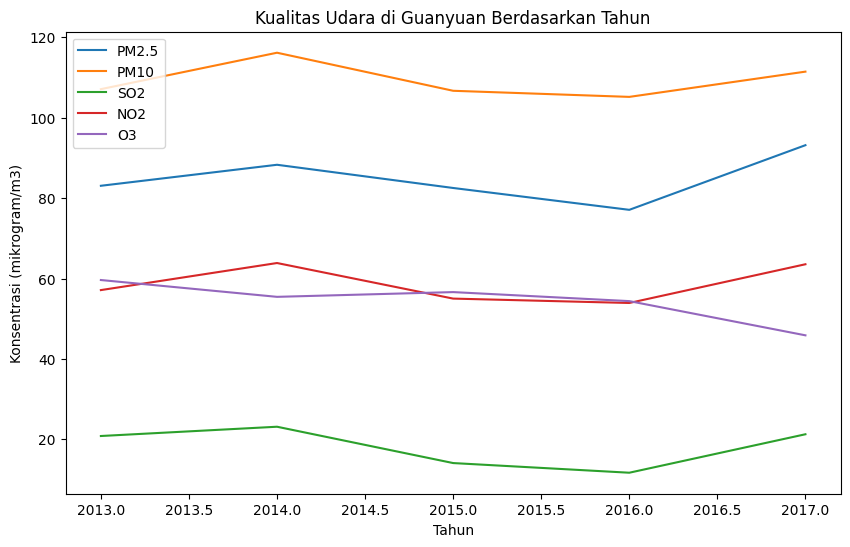

In [135]:
groupByYear = data.groupby("year").mean(numeric_only=True)


plt.figure(figsize=(10,6))
plt.plot(groupByYear.index, groupByYear["PM2.5"], label="PM2.5")
plt.plot(groupByYear.index, groupByYear["PM10"], label="PM10")
plt.plot(groupByYear.index, groupByYear["SO2"], label="SO2")
plt.plot(groupByYear.index, groupByYear["NO2"], label="NO2")
plt.plot(groupByYear.index, groupByYear["O3"], label="O3")
plt.xlabel("Tahun")
plt.ylabel("Konsentrasi (mikrogram/m3)")
plt.title("Kualitas Udara di Guanyuan Berdasarkan Tahun")
plt.legend()
plt.show()

Karena Kulitas Udara terlalu tinggi, akan dipisahkan grafiknya

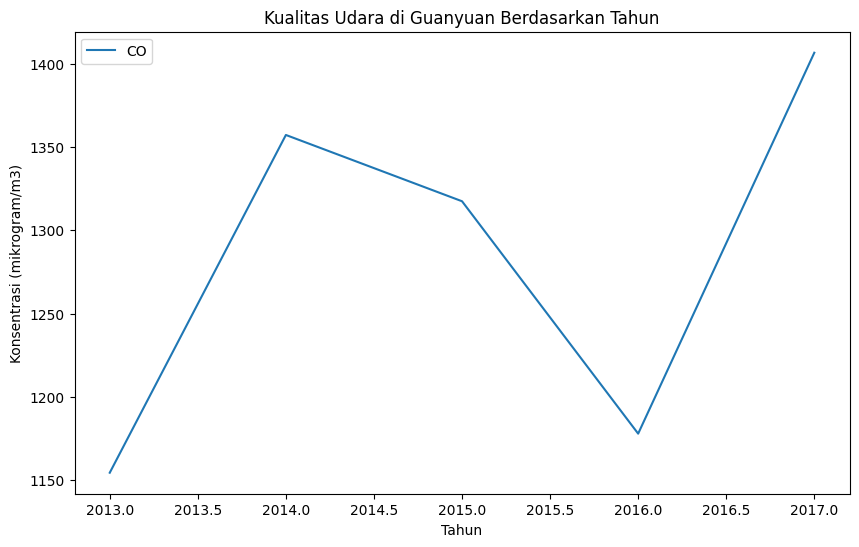

In [136]:
groupByYear = data.groupby("year").mean(numeric_only=True)


plt.figure(figsize=(10,6))
plt.plot(groupByYear.index, groupByYear["CO"], label="CO")
plt.xlabel("Tahun")
plt.ylabel("Konsentrasi (mikrogram/m3)")
plt.title("Kualitas Udara di Guanyuan Berdasarkan Tahun")
plt.legend()
plt.show()

### Pertanyaan 2: Bagaimana perubahan hujan dan kecepatan udara di Guanyuan berdasarkan hari?

In [137]:
def parameter_graph(df):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

    ax[0].plot(df['time'], df['RAIN'], marker='o', linewidth=2, color="#39064B")
    ax[0].tick_params(axis='y', labelsize=20)
    ax[0].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[0].set_ylabel("Rain (mm)", fontsize=25)
    ax[0].set_title("Rain", loc="center", fontsize=35)
    ax[1].plot(df['time'], df['WSPM'], marker='o', linewidth=2, color="#39064B")
    ax[1].tick_params(axis='y', labelsize=20)
    ax[1].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[1].set_ylabel("Wind Speed (km/s)", fontsize=25)
    ax[1].set_title("Wind Speed", loc="center", fontsize=35)

    fig.tight_layout(pad=2.0)

    plt.suptitle("Grafik Perubahan Hujan dan Kecepatan Udara di Guanyuan", fontsize=45, y=1.05)
    plt.show()

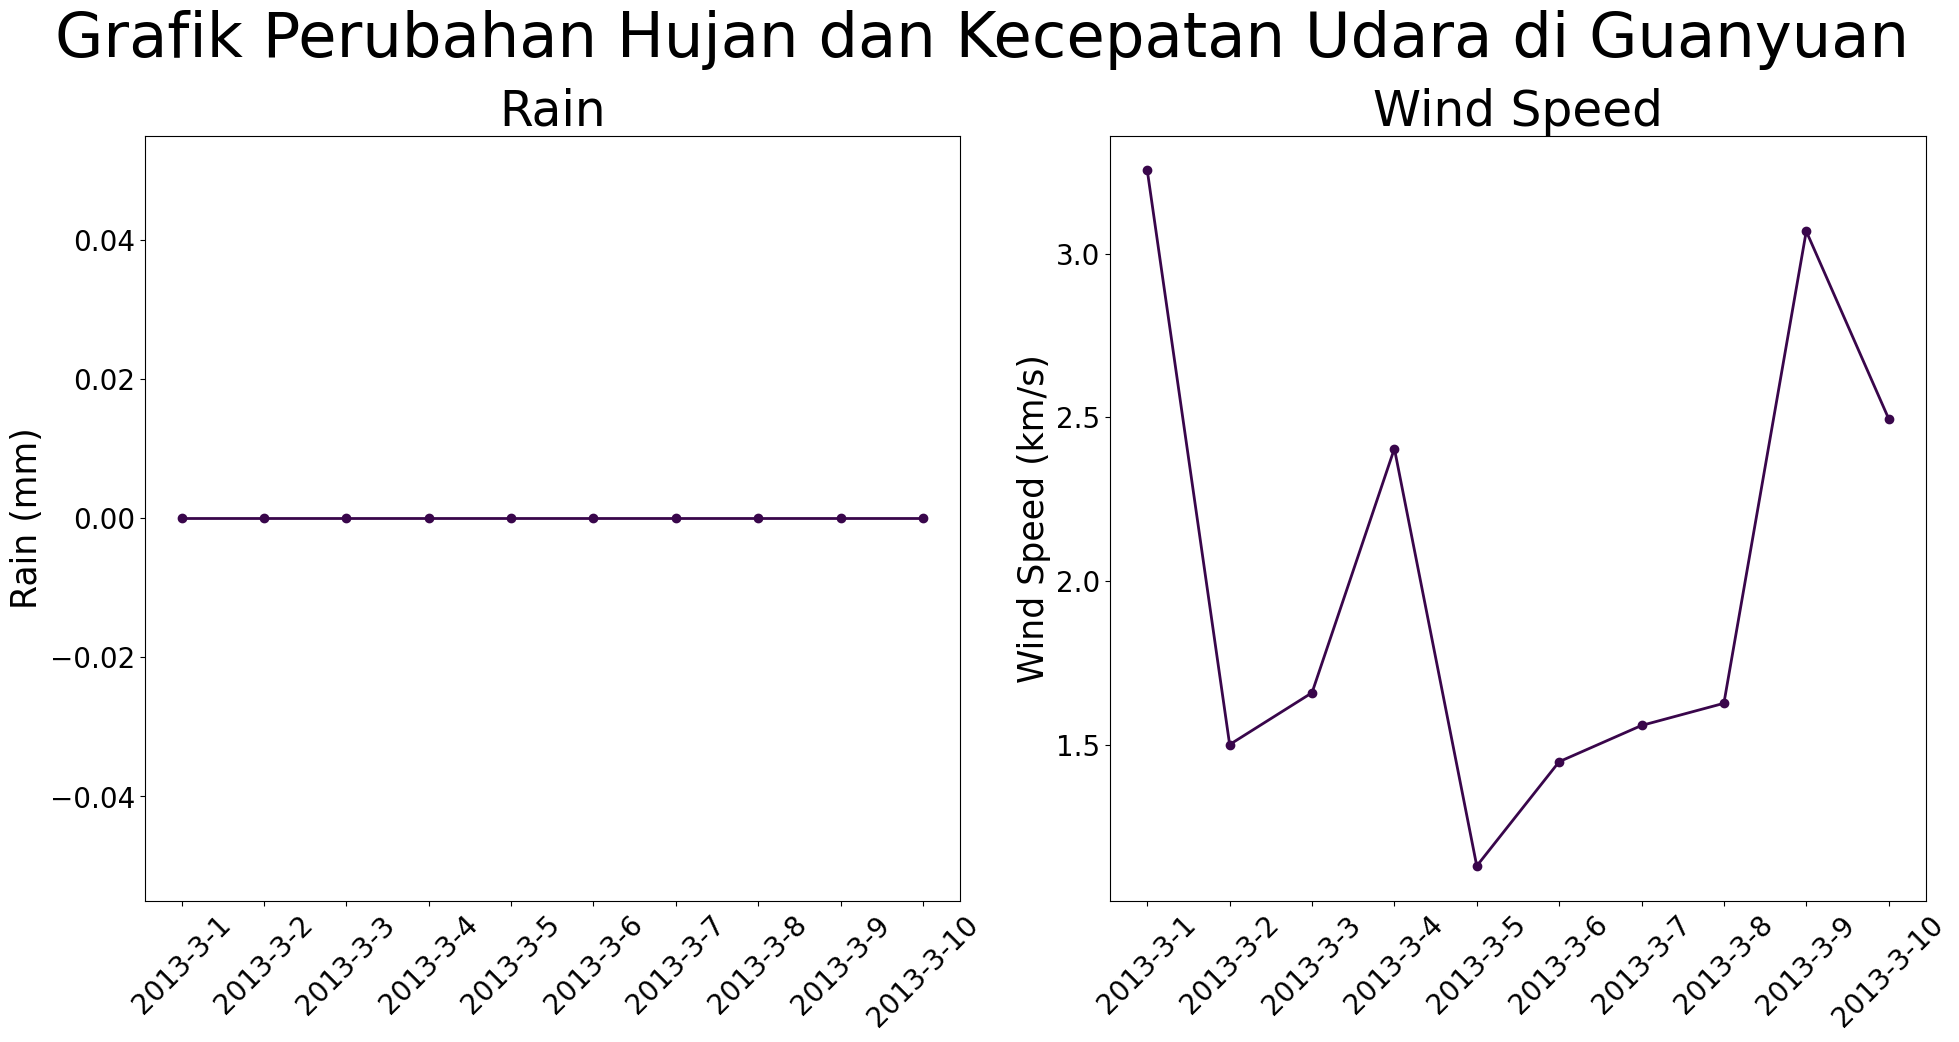

In [138]:
parameter_graph(parameter.head(10))

Rata-rata hujan dan kecepatan udara berdasarkan hari sebagai berikut.

In [139]:
def parameter_show(df):
    suhu= round(df['RAIN'].mean(), 2)
    tekanan= round(df['WSPM'].mean(), 2)

    print("Rata-rata hujan:", str(suhu) + " mm")
    print("Rata-rata kecepatan udara:", str(tekanan) + " km/s")
print("01-03-2013 sampai 10-03-2013 \n")
parameter_show(parameter.head(10))

01-03-2013 sampai 10-03-2013 

Rata-rata hujan: 0.0 mm
Rata-rata kecepatan udara: 2.01 km/s


## Conclusion

- Conclution pertanyaan 1 : Kualitas udara di Guanyuan sedikit membaik terlihat dari populasi O3 yang menurun. Tetapi ada juga yang belum menurun seperti PM2.5, PM10, SO2, dan NO2, namun kualitas udara masih tergolong lebih baik yang didukung pada grafik yang cukup tinggi.

- Conclution pertanyaan 2 : Perubahan hujan di Guanyuan dari 01-03-2013 sampai 10-03-2013 stabil berada di 0.00 mm. Sedangkan pada kecepatan udara di Guanyuan tidak stabil. Apabila dilihat dari grafik harian bulan Maret 2013 angka tertinggi mencapai 3.5 km/s. Hal ini termasuk kategori normal atau light air. Untuk rata-rata hujan di guanyuan pada 01-03-2013 sampai 10-03-2013 diperoleh 0.0 mm. Dan rata-rata kecepatan udara di Guanyuan pada 01-03-2013 sampai 10-03-2013 diperoleh 2.01 km/s.